In [92]:
%load_ext autoreload
%autoreload 2

import traceback
from util import *
from noneSA_myalgorithm import algorithm





The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [94]:

problem_file = 'alg_test_problems_20240429/TEST_K50_2.json'
timelimit = 30

# np.random.seed(1)

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

alg_start_time = time.time()

exception = None

solution = None
try:
    # Run algorithm!
    solution = algorithm(K, ALL_ORDERS, ALL_RIDERS, DIST, timelimit)
except Exception as e:
    exception = f'{e}'
    print(traceback.format_exc())


alg_end_time = time.time()

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

checked_solution = solution_check(K, ALL_ORDERS, ALL_RIDERS, DIST, solution)

checked_solution['time'] = alg_end_time - alg_start_time
checked_solution['timelimit_exception'] = (alg_end_time - alg_start_time) > timelimit + 1 # allowing additional 1 second!
checked_solution['exception'] = exception

checked_solution['prob_name'] = prob['name']
checked_solution['prob_file'] = problem_file

checked_solution

iter_cnt : 2


{'total_cost': 255178.4,
 'avg_cost': 5103.568,
 'num_drivers': 31,
 'total_dist': 125802,
 'feasible': True,
 'infeasibility': None,
 'bundles': [['BIKE', [44, 21], [44, 21]],
  ['BIKE', [6, 5], [6, 5]],
  ['CAR', [27, 28], [27, 28]],
  ['BIKE', [14, 17], [17, 14]],
  ['BIKE', [3, 11], [11, 3]],
  ['BIKE', [19, 15], [15, 19]],
  ['BIKE', [25, 43], [43, 25]],
  ['CAR', [29, 41], [41, 29]],
  ['BIKE', [40, 34], [40, 34]],
  ['BIKE', [9, 24], [24, 9]],
  ['BIKE', [45, 48], [45, 48]],
  ['BIKE', [33, 20], [33, 20]],
  ['CAR', [49, 31], [31, 49]],
  ['CAR', [23, 30], [23, 30]],
  ['CAR', [8, 13], [8, 13]],
  ['CAR', [35, 42], [35, 42]],
  ['CAR', [4, 7], [4, 7]],
  ['CAR', [0, 12], [0, 12]],
  ['CAR', [32, 47], [32, 47]],
  ['WALK', [1], [1]],
  ['WALK', [2], [2]],
  ['CAR', [10], [10]],
  ['CAR', [16], [16]],
  ['WALK', [18], [18]],
  ['WALK', [22], [22]],
  ['WALK', [26], [26]],
  ['CAR', [36], [36]],
  ['WALK', [37], [37]],
  ['WALK', [38], [38]],
  ['CAR', [39], [39]],
  ['WALK', [46],

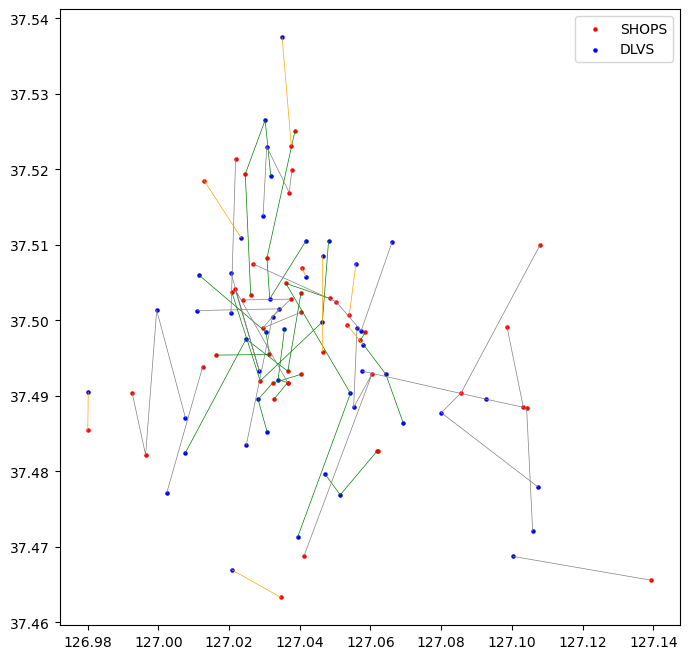

In [95]:
draw_route_solution(ALL_ORDERS, checked_solution)

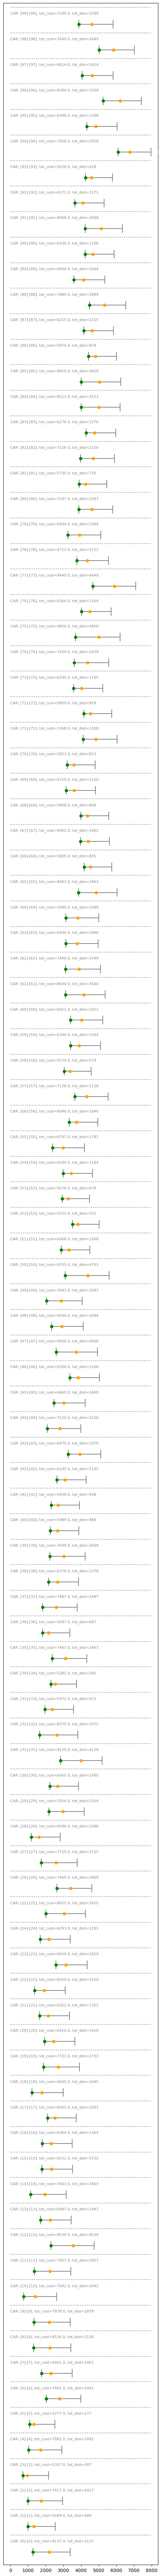

In [8]:
draw_bundle_solution(ALL_ORDERS, ALL_RIDERS, DIST, checked_solution)